In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
my_data = np.genfromtxt('BCI01.csv',delimiter=',')
initial_time = my_data[0,17]

In [3]:
my_data = my_data[12500:]
my_data.shape

(472995, 18)

In [4]:
import pandas as pd
bci_data = pd.read_csv("UI01.csv",header = None).to_numpy()

In [5]:
bci_data[0,2]

1653722047239

In [6]:
my_data[0,-1]

1653722094158.0

In [7]:
bci_data[1,2] - my_data[10000,-1]

-6861.0

In [8]:
def draw_graph(inp):
    x = range(inp.shape[0])
    f, axis = plt.subplots(8)
    f.set_figheight(50)
    f.set_figwidth(15)
    for i in range(8):
        axis[i].plot(x,inp[:,i])
        axis[i].set_title(f"Channel {i+1}")
    plt.subplots_adjust(wspace=0.4, 
                        hspace=0.9)
    plt.show()    

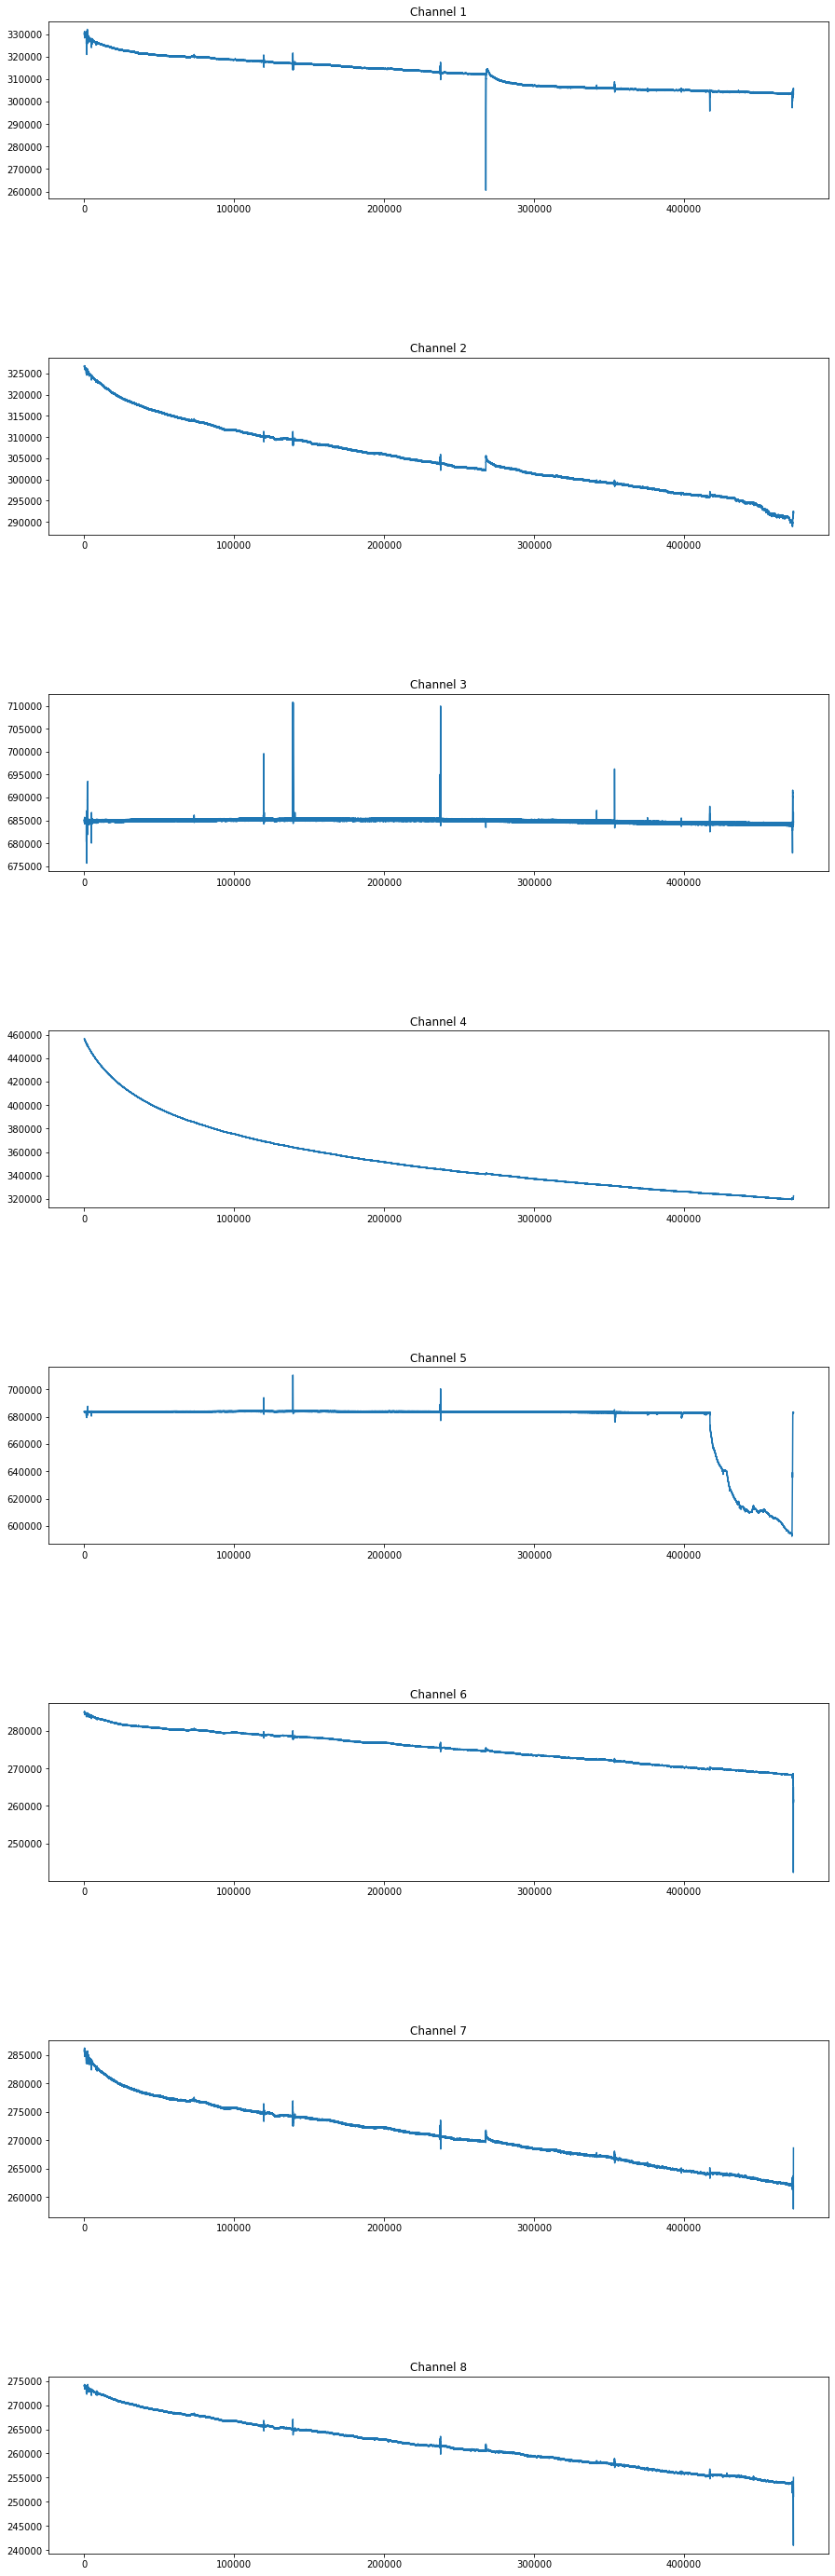

In [9]:
draw_graph(my_data)

In [10]:
from scipy.signal import butter, lfilter

from ConfigUnicorn import *


def notch_Filter(sample):
    from scipy import signal
    b_notch, a_notch = signal.iirnotch(NOTCH_FREQ, QUALITY_FACTOR, SAMPLING_FREQUENCY)
    outputSignal = signal.filtfilt(b_notch, a_notch, sample)
    return outputSignal


def butter_bandpass(lowcut, highcut, fs):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(N=4, Wn=[low, high], btype='band')
    return b, a


def band_Pass_filter_raw(sample):
    b, a = butter_bandpass(0.1, 60, 250)
    y = lfilter(b, a, sample)
    return y


def band_Pass_filter(sample):
    b, a = butter_bandpass(LOWCUT_FREQ, HIGHCUT_FREQ, 250)
    y = lfilter(b, a, sample)
    return y


def preprocessing_Raw(data):
    for i in range(NUMBER_OF_CHANNELS):
        y = band_Pass_filter_raw(data[:,i])
        z = notch_Filter(y)
        data[:,i] = z


def preprocessing(data, is_train):
    # Common Average Reference
    avarageSignal = np.mean(data, axis=1)
    for i in range(NUMBER_OF_CHANNELS):
        data[:,i] -= avarageSignal

    # Band_Pass_Filter
    for i in range(NUMBER_OF_CHANNELS):
        filtered_signal = band_Pass_filter(data[:,i])
        data[:,i] = filtered_signal

    # Standardization
    if is_train:
        means = []
        stds = []
        for i in range(NUMBER_OF_CHANNELS):
            mean = data[:,i].mean()
            std = data[:,i].std()
            means.append(mean)
            stds.append(std)
            data[:,i] = (data[:,i] - mean) / std
#             with open(f'./experiment/{NAME}/StandardizationValues.npy', 'wb') as f:
#                 np.save(f, np.array(means))
#                 np.save(f, np.array(stds))

    else:
        pass
#         with open('./experiment/{NAME}/StandardizationValues.npy', 'rb') as f:
#             means = np.load(f)
#             stds = np.load(f)
#         for i in range(NUMBER_OF_CHANNELS):
#             data[i] = (data[i] - means[i]) / stds[i]


In [11]:
raw_data = np.copy(my_data[:,:8])

In [12]:
filtered_data = np.copy(raw_data)
for i in range(NUMBER_OF_CHANNELS):
    y = band_Pass_filter_raw(np.copy(raw_data[:,i]))
    filtered_data[:,i] = y

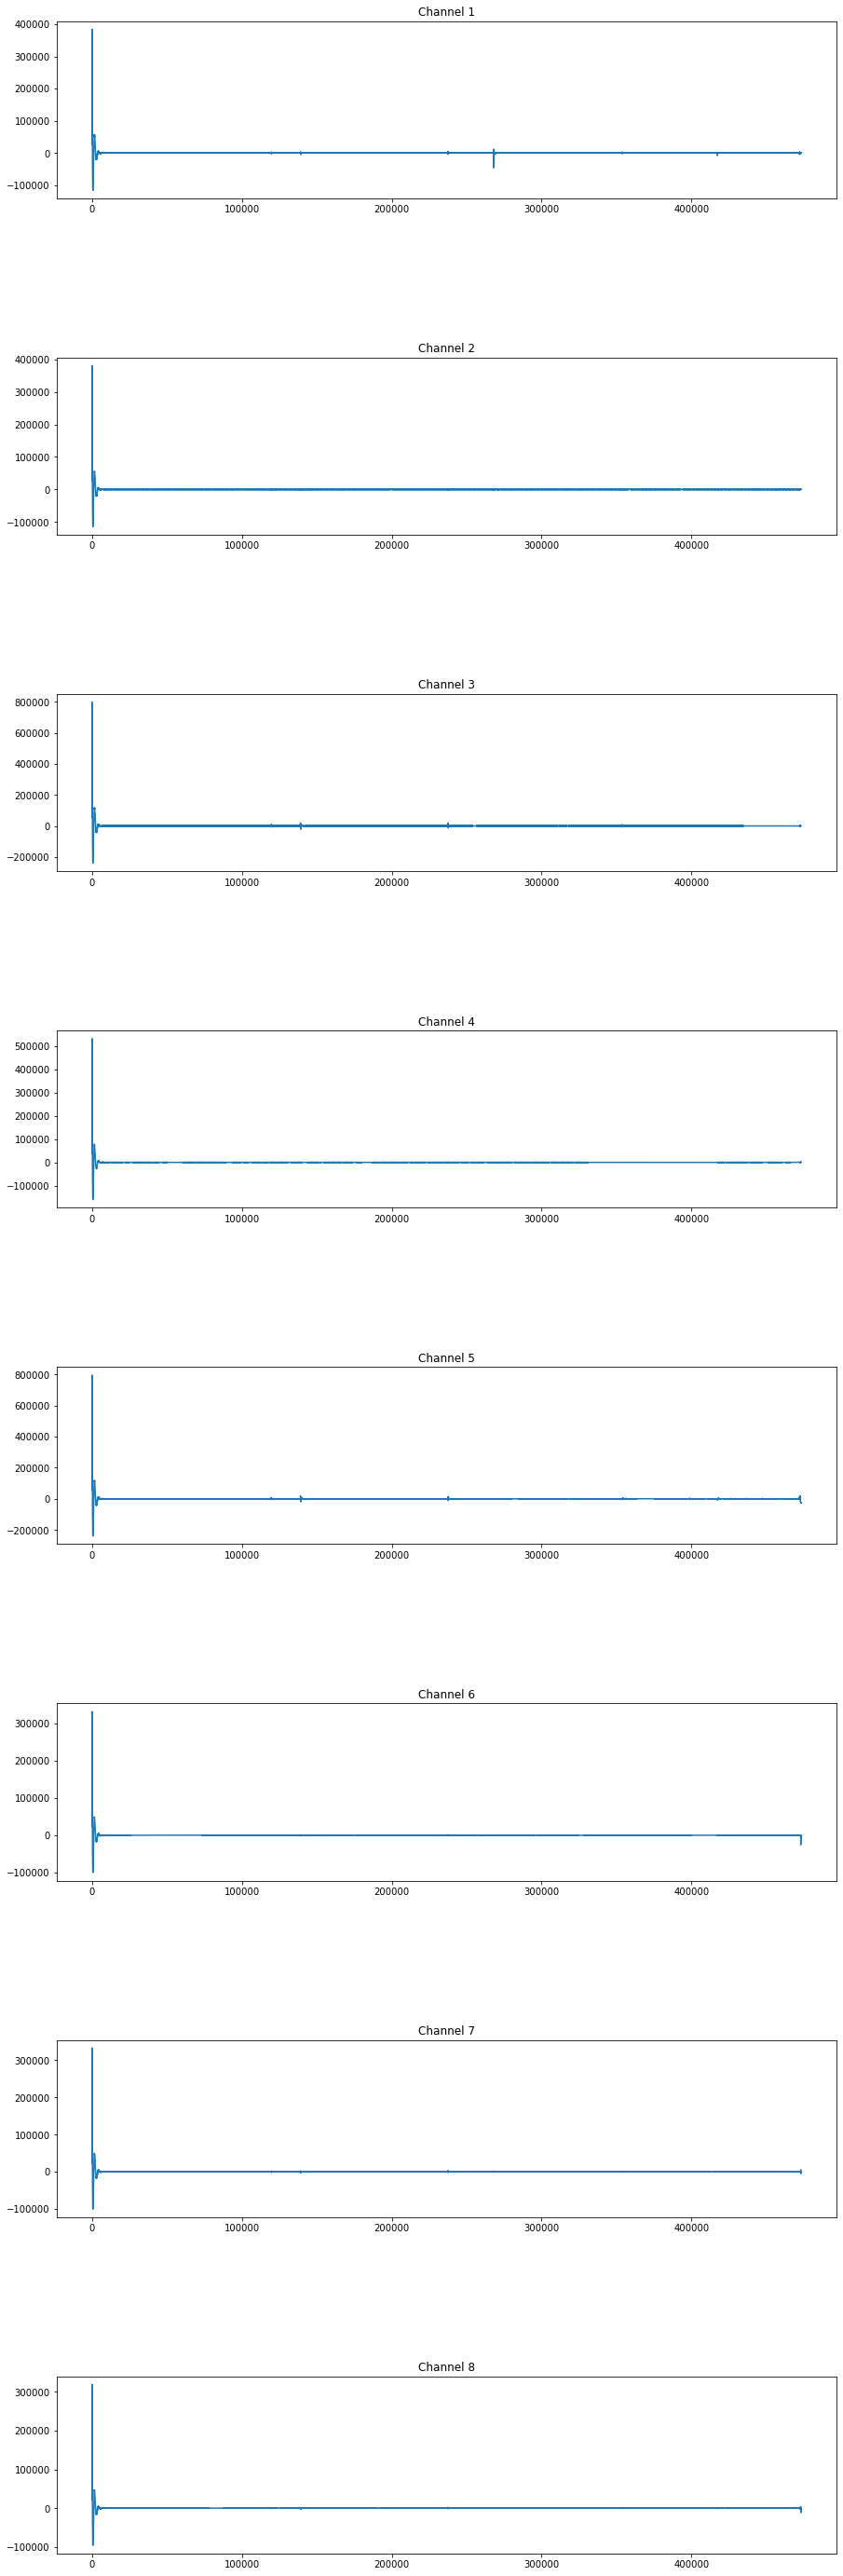

In [13]:
draw_graph(filtered_data)  

(8,)


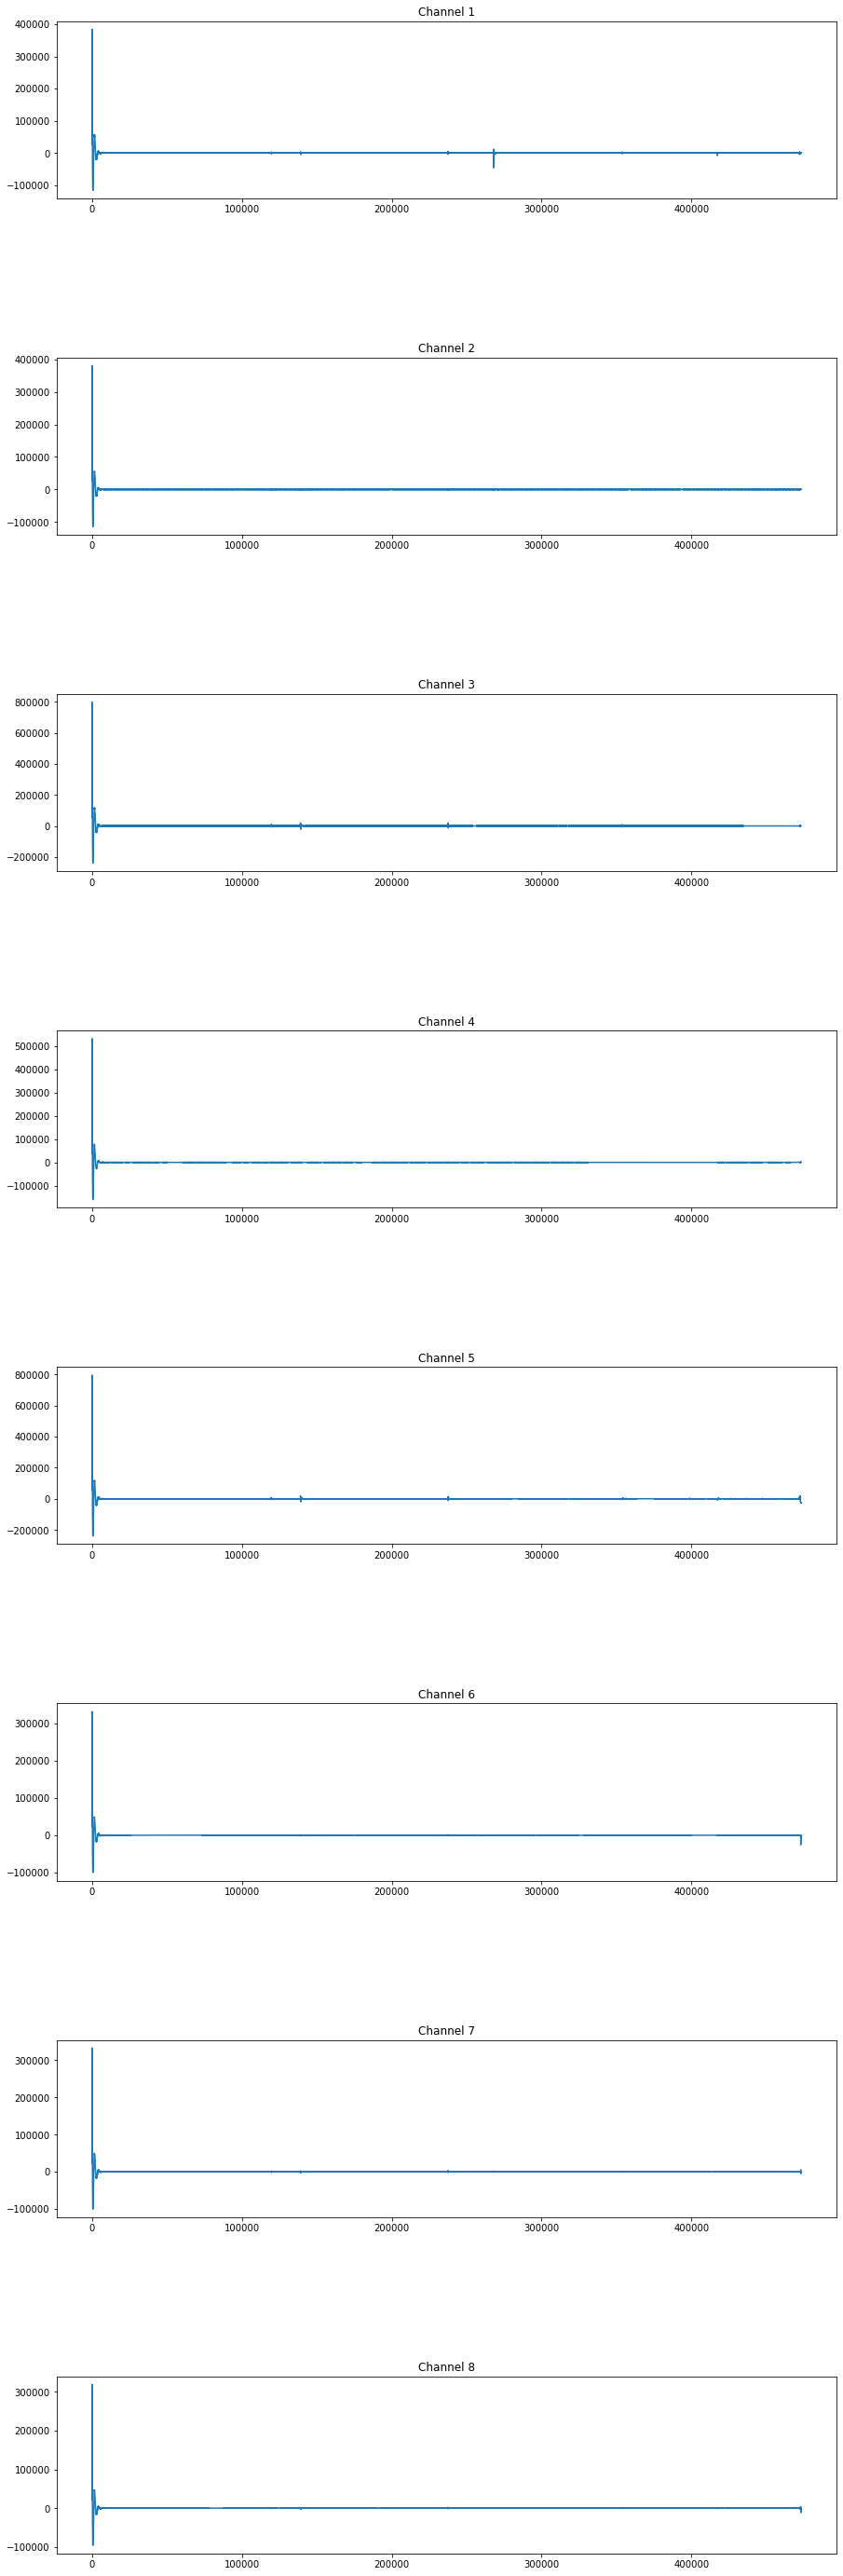

In [14]:
x= range(filtered_data.shape[0])
f, axis = plt.subplots(8)
f.set_figheight(50)
f.set_figwidth(15)
print(axis.shape)
for i in range(8):
    axis[i].plot(x,filtered_data[:,i])
    axis[i].set_title(f"Channel {i+1}")
plt.subplots_adjust(wspace=0.4, 
                    hspace=0.9)
plt.show()    

In [15]:
notch_data = np.copy(filtered_data)
for i in range(NUMBER_OF_CHANNELS):
    y = notch_Filter(np.copy(notch_data[:,i]))
    notch_data[:,i] = y

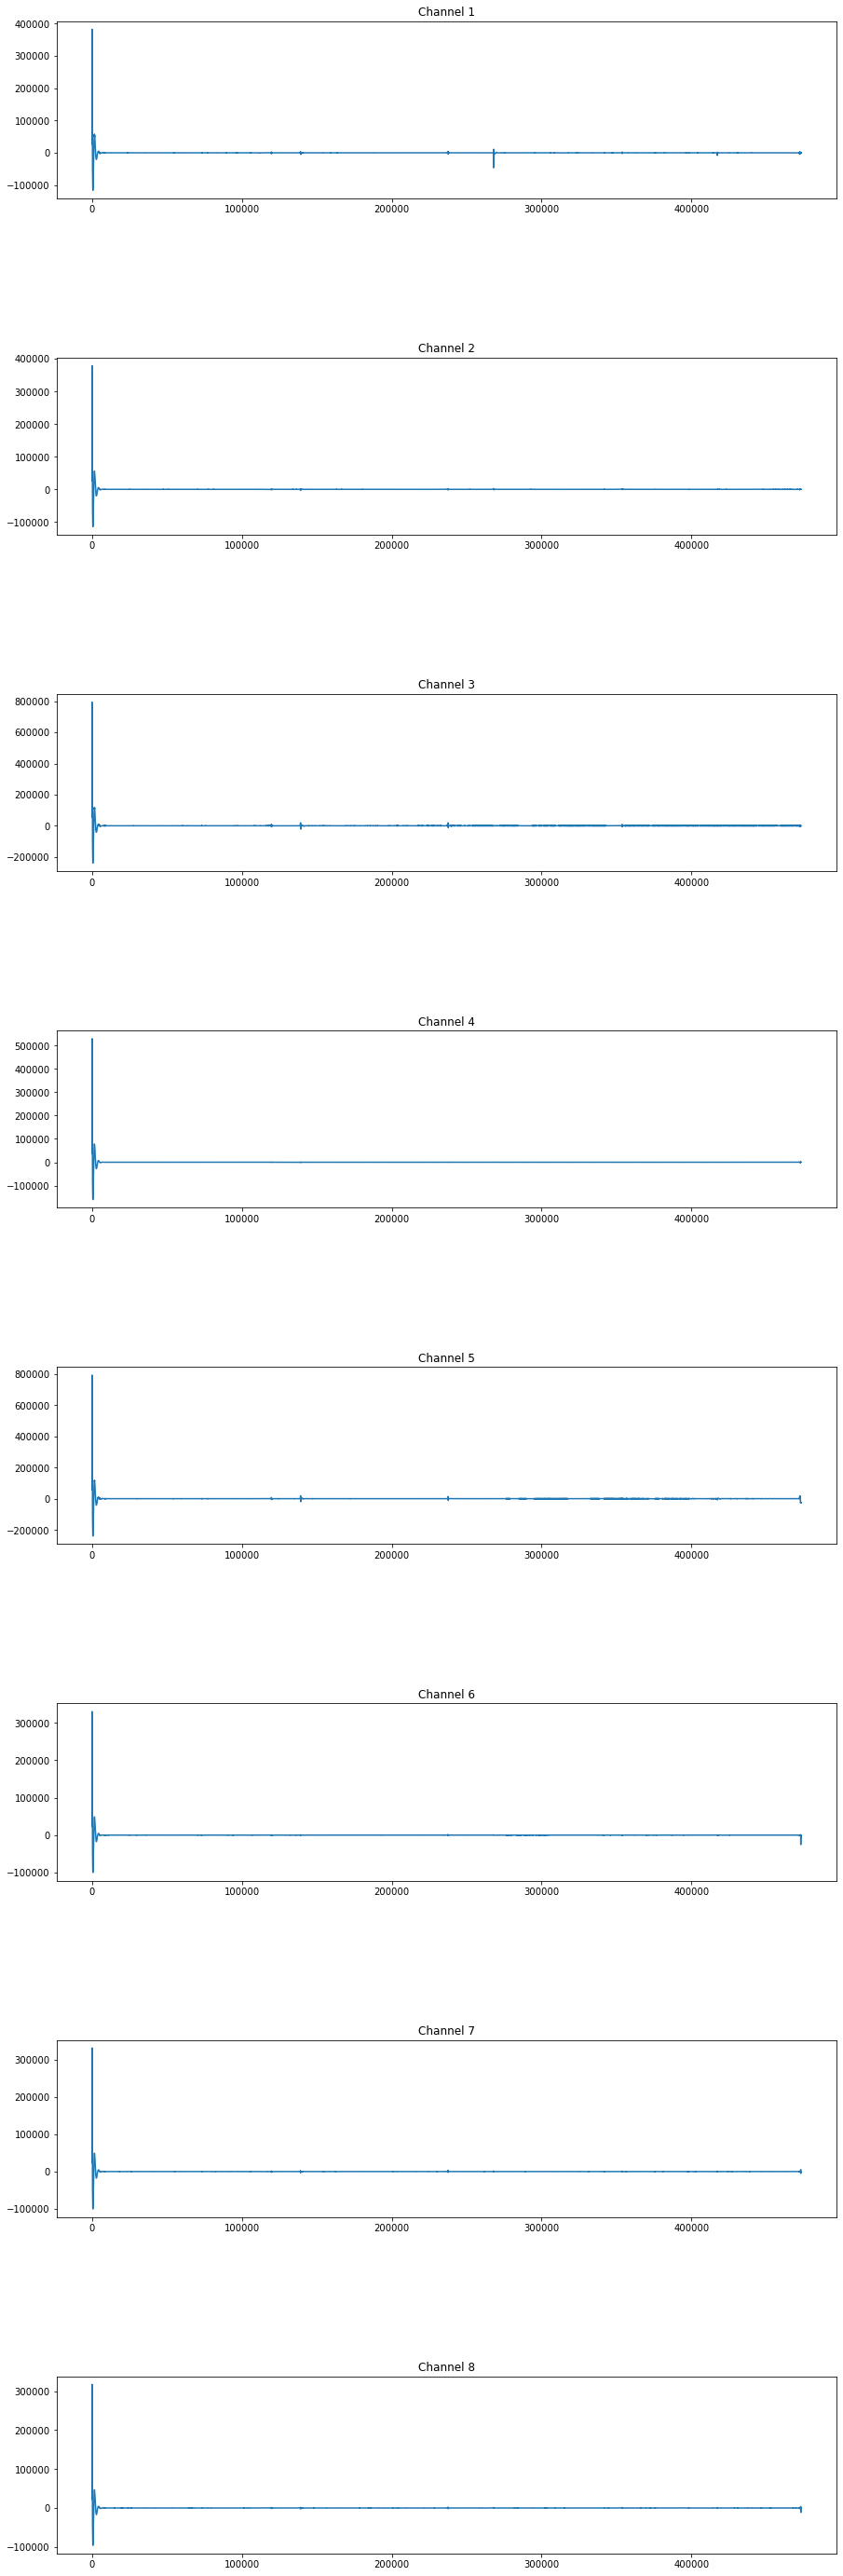

In [16]:

draw_graph(notch_data)

In [17]:
car_data = np.copy(notch_data)
avarageSignal = np.mean(car_data, axis=1)
print(avarageSignal.shape)
for i in range(NUMBER_OF_CHANNELS):
    car_data[:,i] -= avarageSignal

(472995,)


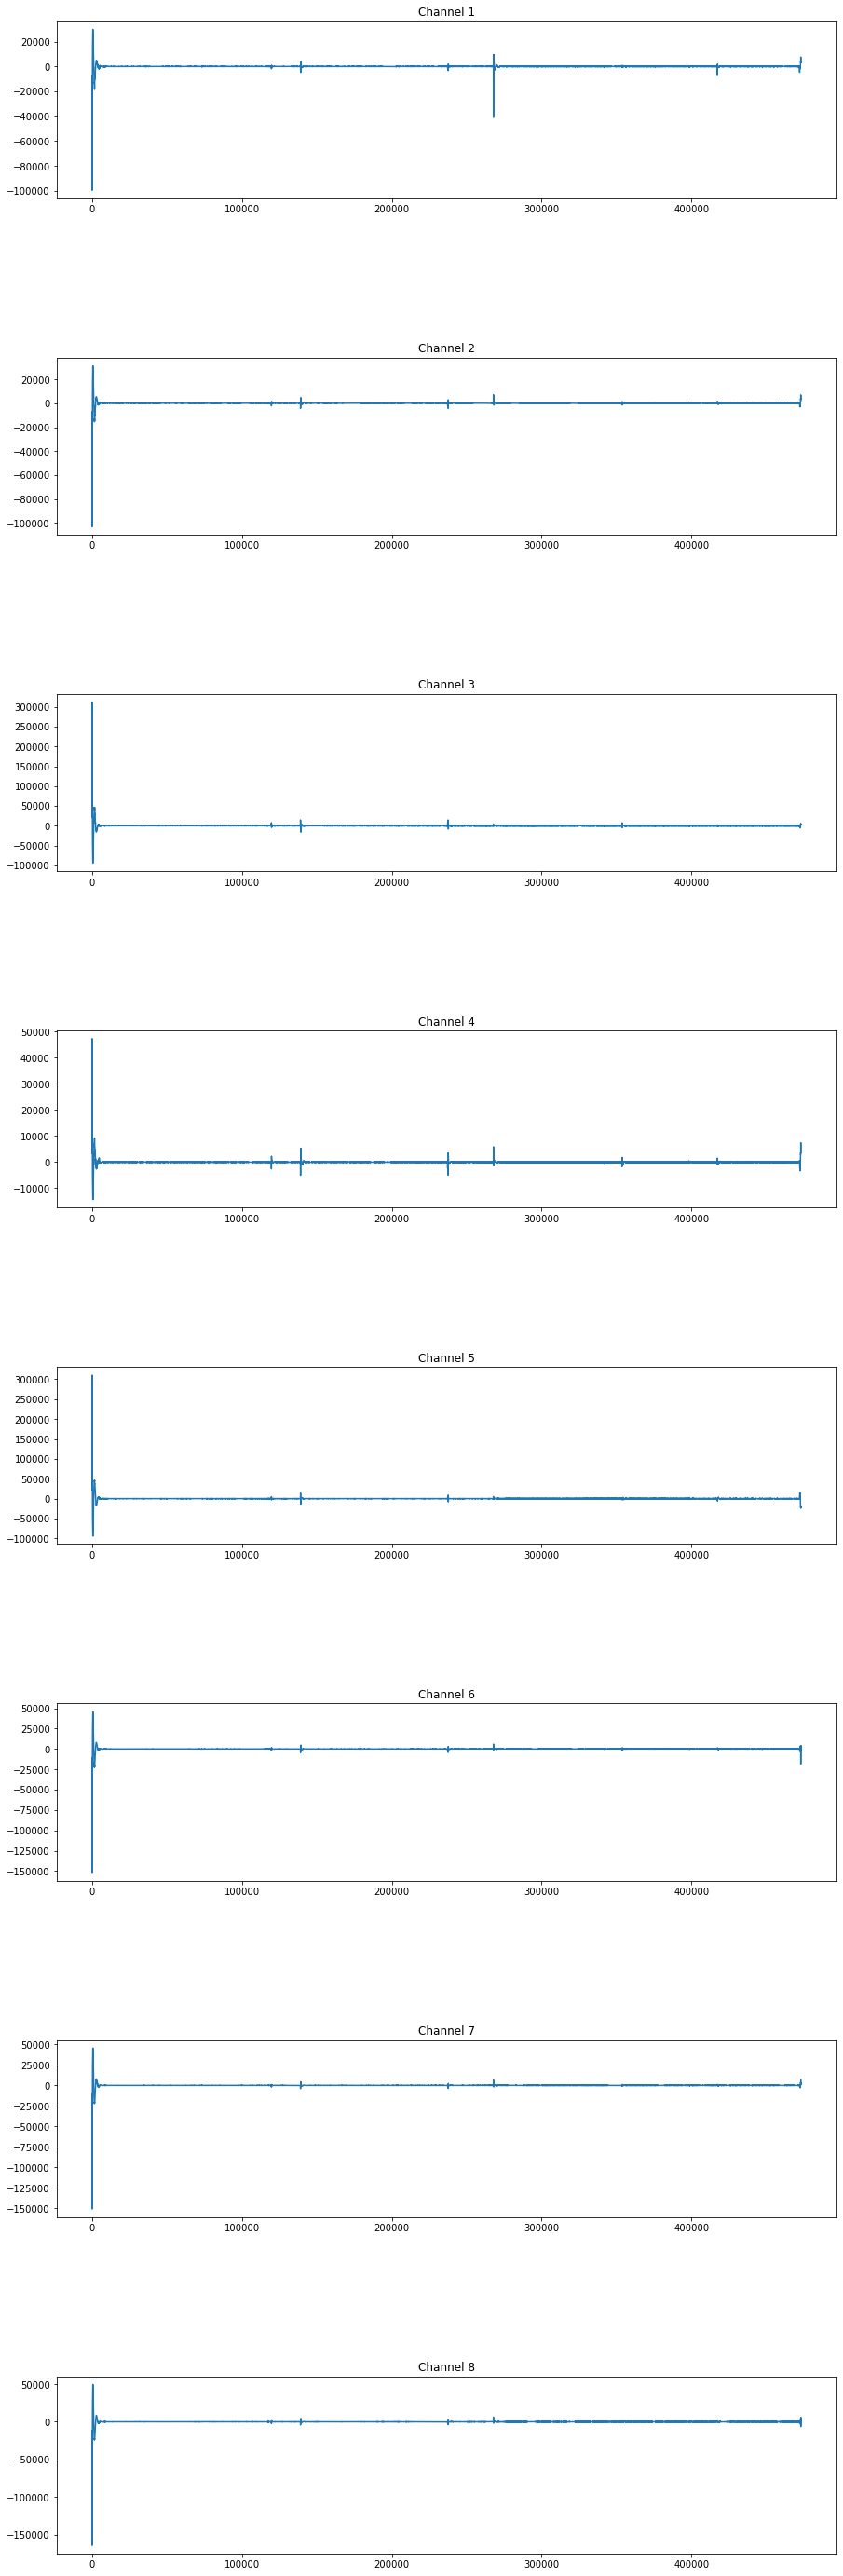

In [18]:
draw_graph(car_data)


In [19]:
filtered_data = np.copy(car_data)
for i in range(NUMBER_OF_CHANNELS):
    y = band_Pass_filter(np.copy(car_data[:,i]))
    filtered_data[:,i] = y


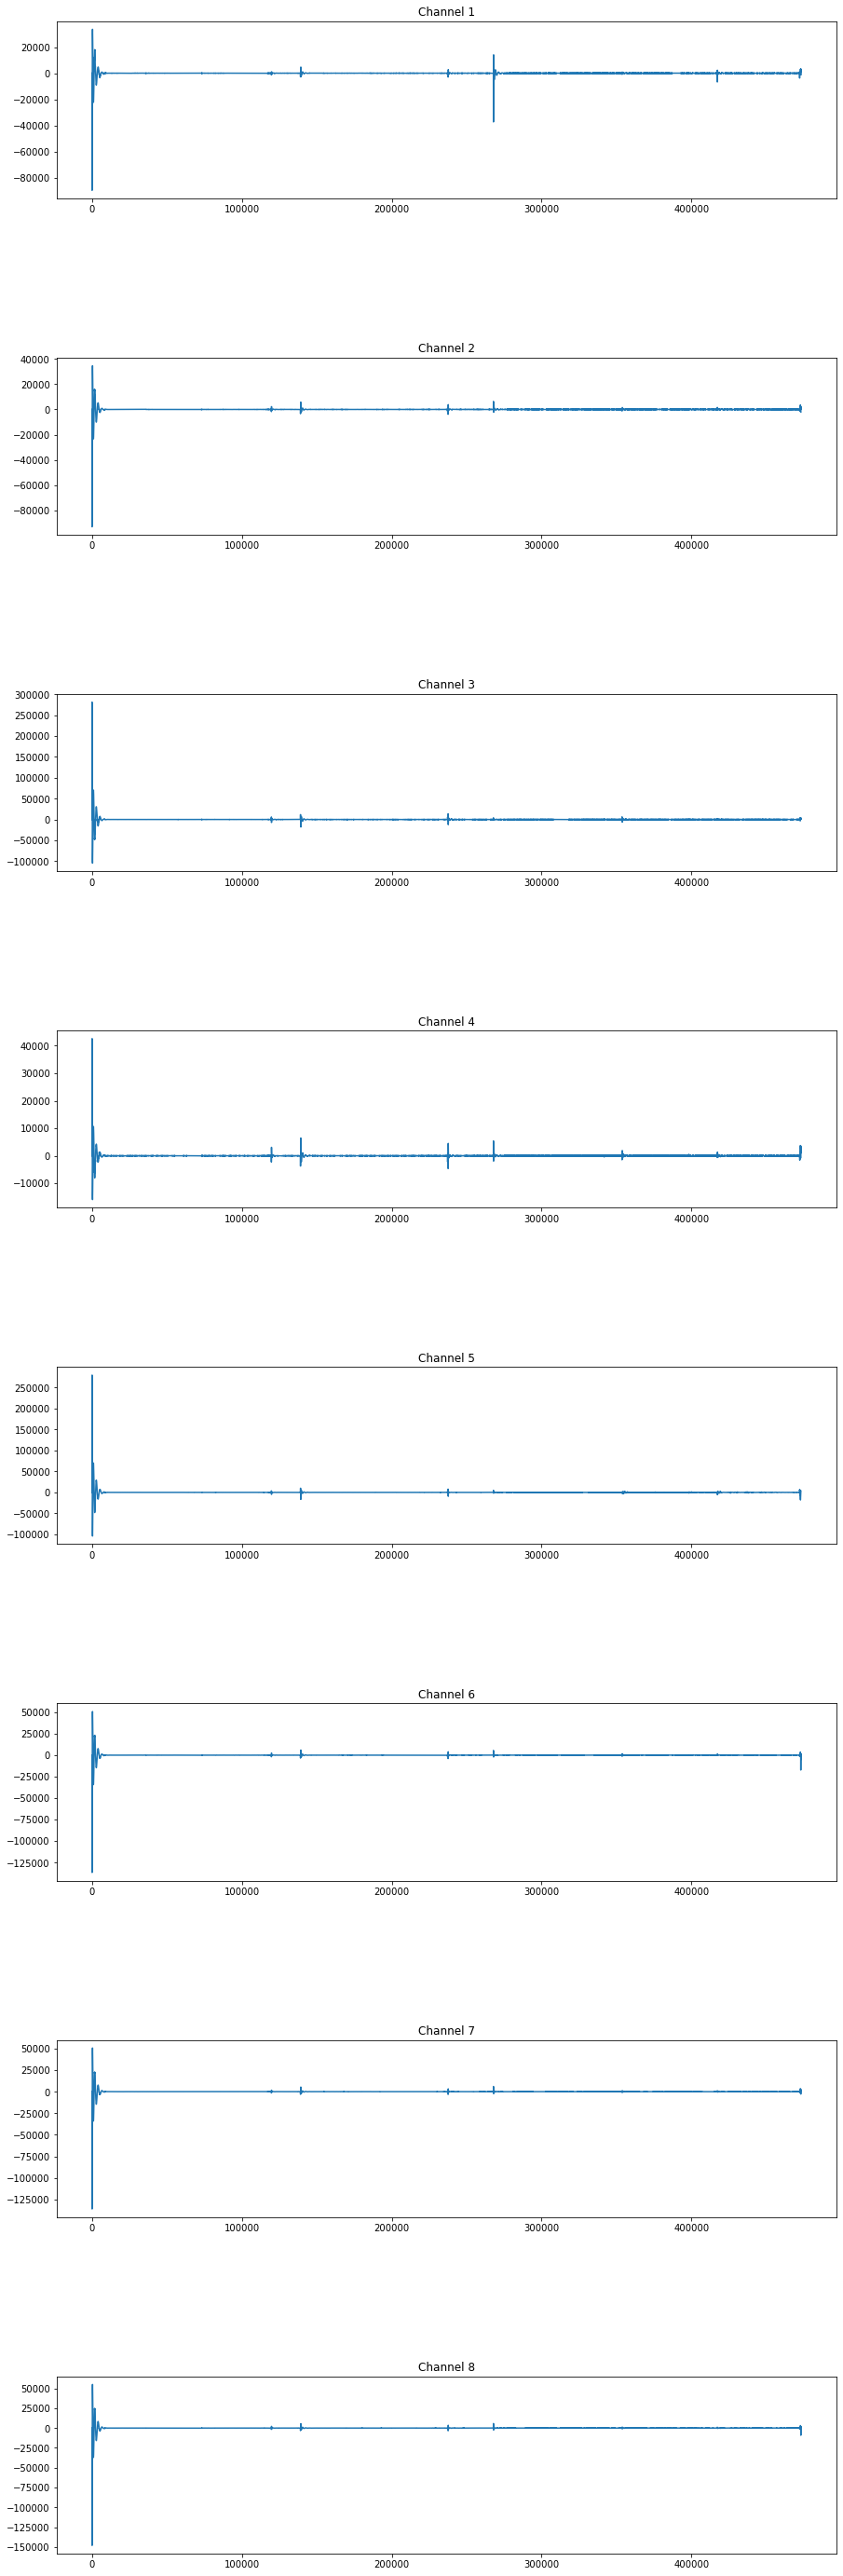

In [20]:
draw_graph(filtered_data)


In [21]:
final_data = np.copy(filtered_data)
means = []
stds = []
for i in range(NUMBER_OF_CHANNELS):
    mean = final_data[:,i].mean()
    std = final_data[:,i].std()
    means.append(mean)
    stds.append(std)
    final_data[:,i] = (final_data[:,i] - mean) / std

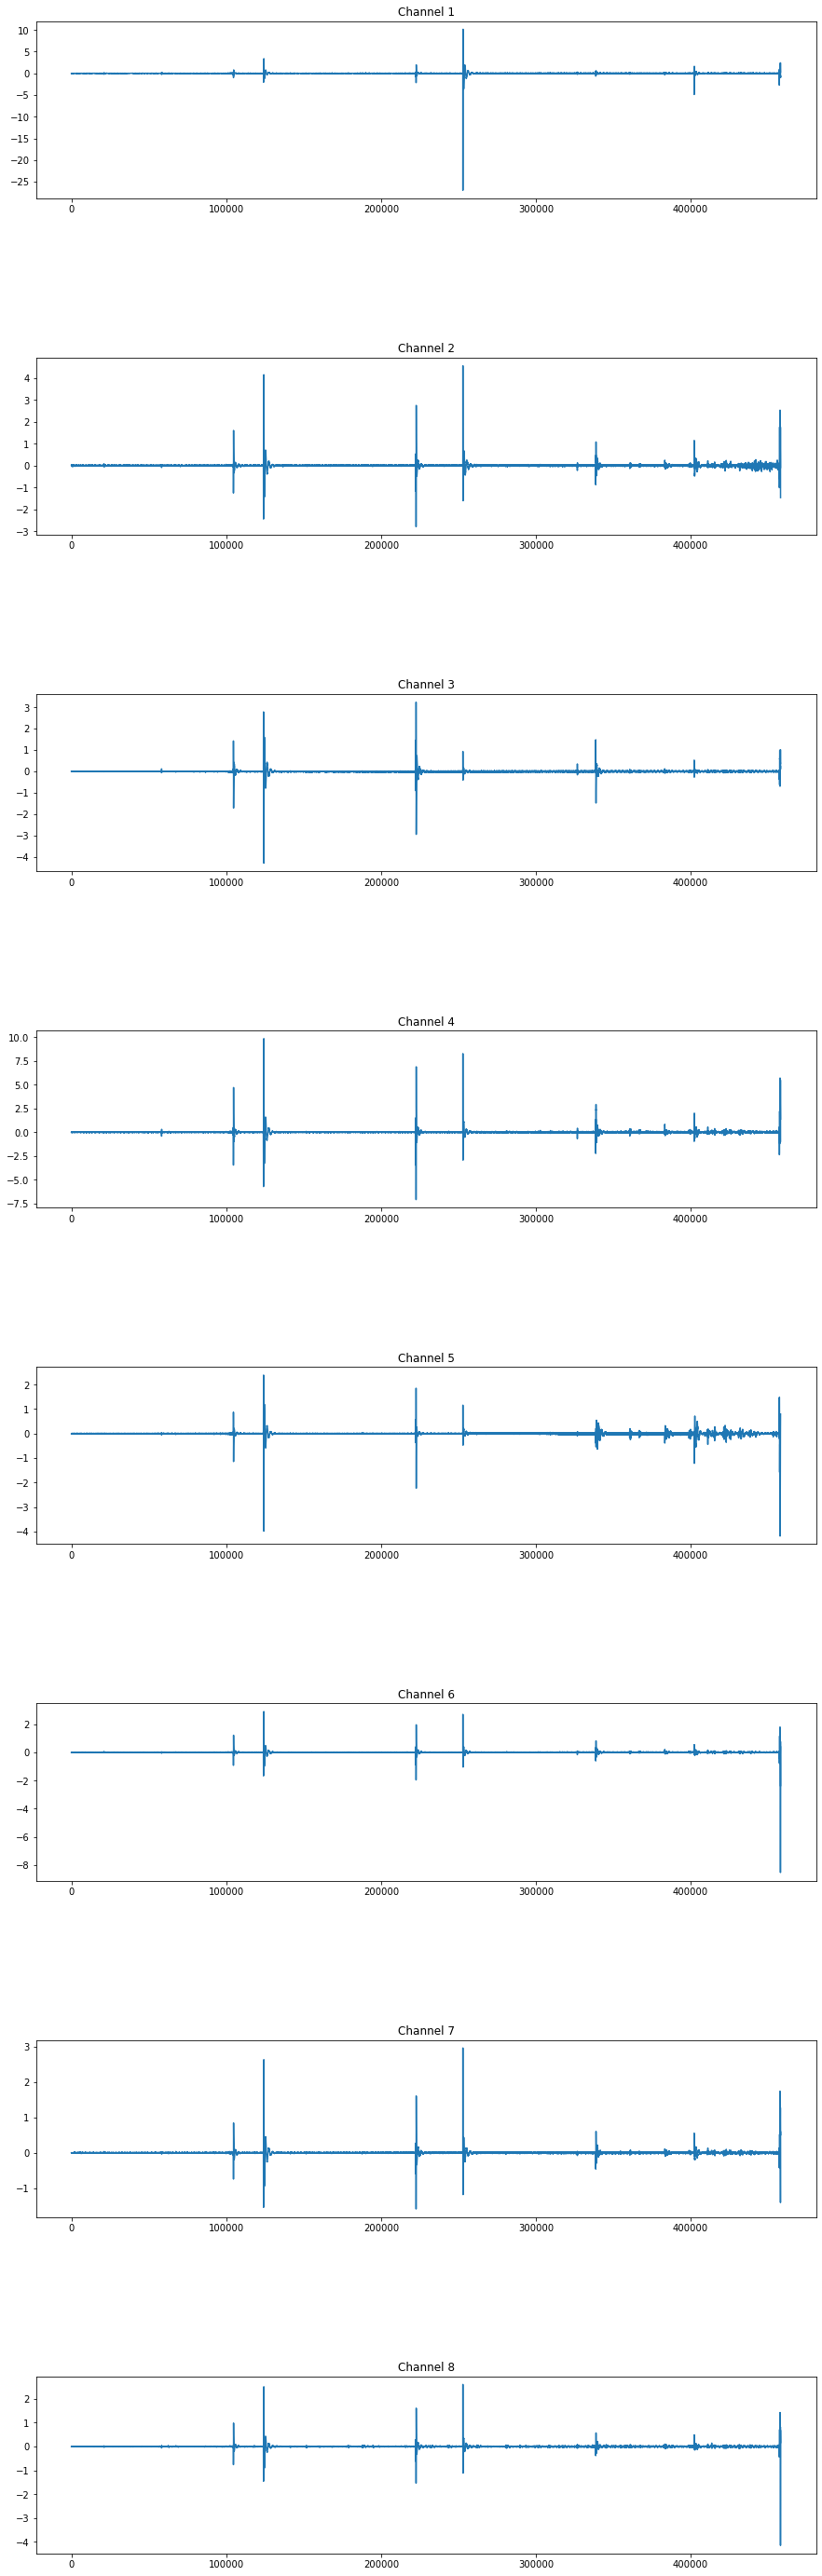

In [22]:
draw_graph(final_data[15000:])

In [23]:
final_data.shape

(472995, 8)

In [24]:
time = my_data[:,17]
code = my_data[:,15]
bci_data[-1,2]-initial_time
j = int(0)
stimuli = []
targets = []


In [25]:
time.shape

(472995,)

In [26]:
code.shape

(472995,)

In [27]:
code

array([ 12501.,  12502.,  12503., ..., 485493., 485494., 485495.])

In [28]:
(bci_data[-1,2])

1653723976692

In [29]:
code[-1]

485495.0

In [30]:
for i in range(bci_data.shape[0]):
    if i< bci_data.shape[0]-1:
        t = bci_data[i+1,2]
    else:
        t = int(time[-1]*2)
#     print(t)
    current_code = (t-initial_time)/4
    while j<final_data.shape[0]:
        if current_code <= code[j]:
            break
        stimuli.append(bci_data[i,0])
        targets.append(bci_data[i,1])
        j+=1
        

In [31]:
stimuli[-1000:]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [32]:
stimuli = np.array(stimuli)
targets = np.array(targets)


In [33]:
stimuli.shape

(472995,)

In [34]:
targets.shape

(472995,)

In [35]:
stimuli[-250:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
def indeces_of_instruction(c):
    indeces = np.where(INSTRUCTION_MATRIX == c)
    row = indeces[0][0] + 4
    col = indeces[1][0] + 1
    return row, col

In [37]:
def prepare_for_model(signal, code, targeted):
    print(code)
    p300_res = np.zeros(WINDOW * NUMBER_OF_CHANNELS)
    nonp300_res = np.zeros(WINDOW * CHANNELS.shape[0])
    # if it has P300
    isP300 = np.zeros(NUMBER_OF_EPOCHS * NUMBER_OF_FLASHES, int)
    update_p300 = 0
    update_non_p300 = 0
    responses = np.zeros((NUMBER_OF_EPOCHS * NUMBER_OF_FLASHES, WINDOW * NUMBER_OF_CHANNELS), np.float32)
    epoch = 0
    current_flash_number = int(0)
    instructions = []
    current_instruction = ""
    targeted_row, targeted_col = 0, 0
    #Looping over eache entry in our signal
    for i in range(1, signal.shape[0]):
        #Checking if flashing starts
        if code[i - 1] < 0.5 < code[i]:
            if current_flash_number == 0:
                current_instruction = targeted[i]
                instructions.append(current_instruction)

                targeted_row, targeted_col = indeces_of_instruction(current_instruction)
                isP300[NUMBER_OF_FLASHES * epoch + targeted_row - 1] = 1
                isP300[NUMBER_OF_FLASHES * epoch + targeted_col - 1] = 1
            current_flash_number += 1
            rowcol = int(code[i])
#             print(i,rowcol)

            for ch in CHANNELS:
                extracted_sample = signal[i:i + WINDOW, ch]
                responses[epoch * NUMBER_OF_FLASHES + rowcol - 1][ch * WINDOW:ch * WINDOW + WINDOW] += extracted_sample
                if targeted_col == rowcol or targeted_row == rowcol:
                    p300_res[ch * WINDOW:ch * WINDOW + WINDOW] += extracted_sample
                    update_p300+=1
                else:
                    nonp300_res[ch * WINDOW:ch * WINDOW + WINDOW] += extracted_sample
                    update_non_p300+=1
            if current_flash_number == NUMBER_OF_FLASHES * NUMBER_OF_TRIALS:
                current_flash_number = 0
                epoch += 1
    responses = responses / NUMBER_OF_EPOCHS
    p300_res = p300_res / (2 * NUMBER_OF_TRIALS * NUMBER_OF_EPOCHS)
    nonp300_res = nonp300_res / (4 * NUMBER_OF_TRIALS * NUMBER_OF_EPOCHS)
    print(update_p300,update_non_p300)
    return responses, isP300, np.array(instructions), p300_res, nonp300_res


In [38]:
responses,isP300,targets,p300, nonp300 =  prepare_for_model(final_data,stimuli,targets)

[0 0 0 ... 0 0 0]
12000 24000


In [39]:
responses.shape

(300, 2000)

In [40]:
isP300.shape

(300,)

In [41]:
targets.shape

(50,)

In [42]:
p300.shape

(2000,)

In [43]:
nonp300.shape

(2000,)

In [44]:
def graphDrawer(arr, arr2):
    
    plt.figure(figsize=(15,15))
    x_axis = np.array(range(WINDOW*CHANNELS.shape[0])) / SAMPLING_FREQUENCY
    plt.plot(x_axis, arr, color='#188038', label='P300')
    plt.plot(x_axis, arr2, color='#A1282C', label='Non-P300')

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.tight_layout()
    plt.show()


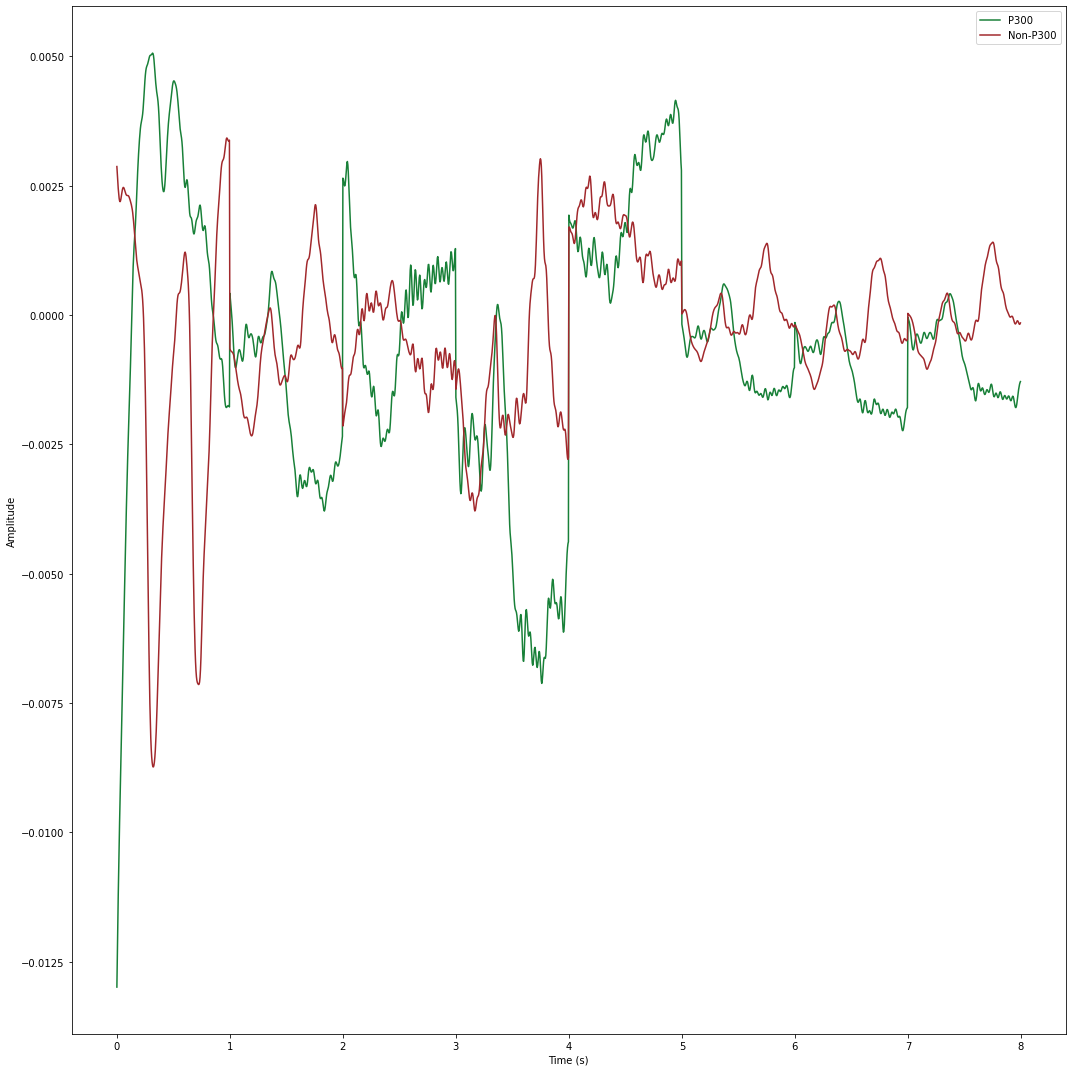

In [45]:
graphDrawer(p300,nonp300)

In [46]:
from sklearn import svm
X=responses[:,4*250:5*250]
X.shape

(300, 250)

In [47]:
def instruction_accuracy(X, characters, clf, prob_func=None):
    if prob_func is None:
        prob_func = clf.decision_function
    correct_predictions_count = 0
    for i in range(len(characters)):
        segment = X[i * NUMBER_OF_FLASHES:i * NUMBER_OF_FLASHES + NUMBER_OF_FLASHES]
        score = prob_func(segment)
        row = np.argmax(score[3:]) + 4
        col = np.argmax(score[:3]) + 1
        predicted_char = INSTRUCTION_MATRIX[row - 7][col - 1]
        target_char = characters[i]
        if target_char == predicted_char:
            correct_predictions_count += 1
    return correct_predictions_count / len(characters)

In [48]:
print("Training")
svc_balanced = svm.SVC(kernel='rbf', probability=True)
svc_balanced.fit(X, isP300)
print("Score on training data SVM RBF balanced: {}".format(svc_balanced.score(X, isP300)))
print("Done")
print("Train Instruction accuracy", instruction_accuracy(X, targets, svc_balanced), "%")
# # print("Train Character accuracy", char_accuracy(X_train, train_characters, svc_unbalanced, Balabizo), "%")
# print("Test Character accuracy", char_accuracy(X_test, test_characters, svc_balanced), "%")

Training
Score on training data SVM RBF balanced: 0.6833333333333333
Done
Train Instruction accuracy 0.34 %
